In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pyodbc

## Data inlezen en kolommen selecteren

In [4]:
vgsales = pd.read_csv("../../../data/raw/vgsales.csv")
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [38]:
vgsales_use = vgsales.loc[:, ['Platform', 'Year', 'Genre', 'Publisher', 'EU_Sales', 'Global_Sales']]
vgsales_use

,Platform,Year,Genre,Publisher,EU_Sales,Global_Sales
0,Wii,2006.0,Sports,Nintendo,29.02,82.74
1,NES,1985.0,Platform,Nintendo,3.58,40.24
2,Wii,2008.0,Racing,Nintendo,12.88,35.82
3,Wii,2009.0,Sports,Nintendo,11.01,33.00
4,GB,1996.0,Role-Playing,Nintendo,8.89,31.37
...,...,...,...,...,...,...
16593,GBA,2002.0,Platform,Kemco,0.00,0.01
16594,GC,2003.0,Shooter,Infogrames,0.00,0.01
16595,PS2,2008.0,Racing,Activision,0.00,0.01
16596,DS,2010.0,Puzzle,7G//AMES,0.01,0.01


## One-hot encoding van onafhankelijke niet-numerieke variabelen

In [39]:
vgsales_use = vgsales_use.dropna()
dummies = pd.get_dummies(vgsales_use[['Platform', 'Genre', 'Publisher']], drop_first=True)


In [40]:
vgsales_use = vgsales_use.drop(['Platform', 'Genre', 'Publisher'], axis=1)
vgsales_use = pd.concat([vgsales_use, dummies], axis=1)

In [41]:
vgsales_use

,Year,EU_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,2006.0,29.02,82.74,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1985.0,3.58,40.24,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2008.0,12.88,35.82,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2009.0,11.01,33.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1996.0,8.89,31.37,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,2002.0,0.00,0.01,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
16594,2003.0,0.00,0.01,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
16595,2008.0,0.00,0.01,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16596,2010.0,0.01,0.01,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Verticaal en horizontaal snijden

In [42]:
X = vgsales_use.loc[vgsales_use['EU_Sales'].notna(), :]
X = X.drop('EU_Sales', axis = 1)
y = vgsales_use.loc[vgsales_use['EU_Sales'].notna(), ['EU_Sales']]
X.info()



<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Columns: 618 entries, Year to Publisher_responDESIGN
dtypes: bool(616), float64(2)
memory usage: 9.9 MB


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.15,
    random_state = 42
) 

## Regressiemodel bouwen

In [44]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, y_train)
reg_model

LinearRegression()

In [45]:
y_pred= reg_model.predict(X_test)
y_pred

array([[ 1.75186985e-01],
       [ 2.98690601e-02],
       [ 5.71070392e-02],
       ...,
       [-2.99596954e-04],
       [ 6.79567193e-01],
       [ 1.86082366e-01]], shape=(2444, 1))

In [48]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns = {0 : 'Predicted_EU_Sales'})
prediction_df

,Predicted_EU_Sales
0,0.175187
1,0.029869
2,0.057107
3,0.214150
4,0.037954
...,...
2439,0.133155
2440,-0.045256
2441,-0.000300
2442,0.679567


In [49]:
y_test_prediction_merge = pd.concat([y_test.reset_index()['EU_Sales'], prediction_df], axis = 1)
y_test_prediction_merge.loc[y_test_prediction_merge['Predicted_EU_Sales'].notna(), :]

,EU_Sales,Predicted_EU_Sales
0,0.01,0.175187
1,0.04,0.029869
2,0.00,0.057107
3,0.16,0.214150
4,0.06,0.037954
...,...,...
2439,0.18,0.133155
2440,0.00,-0.045256
2441,0.00,-0.000300
2442,0.92,0.679567


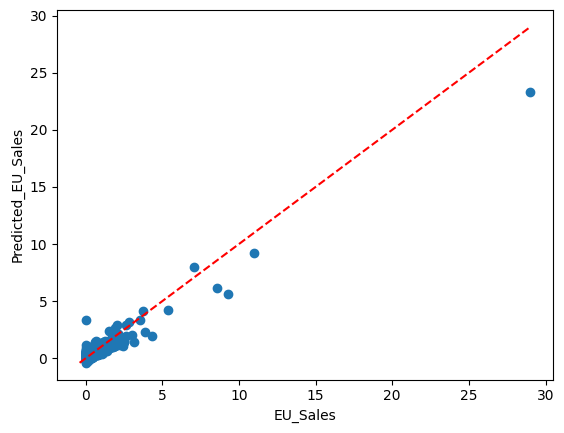

In [50]:
plt.scatter(y_test_prediction_merge['EU_Sales'], y_test_prediction_merge['Predicted_EU_Sales'])
plt.xlabel('EU_Sales')
plt.ylabel('Predicted_EU_Sales')

# Add a line y = x
min_val = min(y_test_prediction_merge['EU_Sales'].min(), y_test_prediction_merge['Predicted_EU_Sales'].min())
max_val = max(y_test_prediction_merge['EU_Sales'].max(), y_test_prediction_merge['Predicted_EU_Sales'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.show()

In [51]:
mean_squared_error(y_test_prediction_merge['EU_Sales'], y_test_prediction_merge['Predicted_EU_Sales'])

0.05165675799612972

In [52]:
mean_absolute_error(y_test_prediction_merge['EU_Sales'], y_test_prediction_merge['Predicted_EU_Sales'])

0.08114729553428926